<img src="../data/header-notebook.jpg" alt="header-image" class = "img-rounded" />

<a id="0"></a> <br>
 # Table of Contents  
1. [Sales Analysis](#1)     
    1. [Revenue Growth](#1a)
    2. [Product Demand](#1b)
    3. [Product-Market Performance](#1c)
2. [Customer Analytics](#2)
    1. [Customer Acquisition](#2a)
    2. [Customer Lifetime Value](#2b)
3. [Time Series Analysis](#3)
    1. [Time Series Data Transformation](#3a)
    2. [Seasonal Sales Trend](#3b)
    3. [Seasonal Product Performance](#3c)
4. [Financial Analysis](#4)
    1. [Discount-Market Impact](#4a)
    2. [Pricing Analysis](#4a)
5. [Analytical Inferences](#5)
    1. [Customer Acquisition Performance](#5a)
    2. [The 2019 Diagnosis](#5b)
    3. [Pricing Problem](#5c)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipympl
import jupyterlab
from matplotlib import widgets
%matplotlib widget


In [2]:
from matplotlib.widgets import Slider, Button

In [3]:
import ipywidgets as widg
from ipywidgets import interactive

In [4]:
#importing prepared data from data wrangling
data = pd.read_csv(r'../data/purchases.csv', index_col= 0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15235 entries, 0 to 15263
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          15235 non-null  int64  
 1   CustomerGender      15235 non-null  object 
 2   ProductName         15235 non-null  object 
 3   ProductPrice        15235 non-null  float64
 4   CostOfGood          15235 non-null  float64
 5   ProductCategory     15235 non-null  object 
 6   CustomerCountry     15235 non-null  object 
 7   CustomerContinent   15235 non-null  object 
 8   OrderTime           15235 non-null  object 
 9   OrderDay            15235 non-null  int64  
 10  OrderMonth          15235 non-null  object 
 11  QuantitySold        15235 non-null  int64  
 12  discountPercentage  15235 non-null  float64
 13  salePrice           15235 non-null  float64
 14  OrderYear           15235 non-null  int64  
 15  ExpectedProfit      15235 non-null  float64
 16  Pric

In [6]:
data.head()

,CustomerId,CustomerGender,ProductName,ProductPrice,CostOfGood,ProductCategory,CustomerCountry,CustomerContinent,OrderTime,OrderDay,OrderMonth,QuantitySold,discountPercentage,salePrice,OrderYear,ExpectedProfit,PricePerQuantity,dateOfPurchase,ProfitMade
0,4070,Female,Hat,713.0,249.55,Movies,Seychelles,Africa,13:43:00,1,February,3,9.0,1946.49,2017,1390.35,648.83,2017-02-01,1197.84
1,2530,Female,Cheese,60.0,47.40,Health,Qatar,Asia,12:25:00,11,February,5,2.0,294.00,2020,63.00,58.80,2020-02-11,57.00
2,2697,Male,Chips,310.0,145.70,Sports,Cameroon,Africa,20:14:00,25,September,2,3.0,601.40,2020,328.60,300.70,2020-09-25,310.00
3,2405,Female,Chair,468.0,149.76,Beauty,Guadeloupe,North America,13:13:00,30,June,1,10.0,421.20,2020,318.24,421.20,2020-06-30,271.44
4,4394,Male,Chicken,360.0,140.40,Health,Swaziland,Africa,22:50:00,28,September,6,8.0,1987.20,2020,1317.60,331.20,2020-09-28,1144.80


In [7]:
# data["OrderYear"] = pd.to_datetime(data["OrderYear"])
# data["OrderYear"] = data["OrderYear"].dt.year

In [8]:
data.head()

,CustomerId,CustomerGender,ProductName,ProductPrice,CostOfGood,ProductCategory,CustomerCountry,CustomerContinent,OrderTime,OrderDay,OrderMonth,QuantitySold,discountPercentage,salePrice,OrderYear,ExpectedProfit,PricePerQuantity,dateOfPurchase,ProfitMade
0,4070,Female,Hat,713.0,249.55,Movies,Seychelles,Africa,13:43:00,1,February,3,9.0,1946.49,2017,1390.35,648.83,2017-02-01,1197.84
1,2530,Female,Cheese,60.0,47.40,Health,Qatar,Asia,12:25:00,11,February,5,2.0,294.00,2020,63.00,58.80,2020-02-11,57.00
2,2697,Male,Chips,310.0,145.70,Sports,Cameroon,Africa,20:14:00,25,September,2,3.0,601.40,2020,328.60,300.70,2020-09-25,310.00
3,2405,Female,Chair,468.0,149.76,Beauty,Guadeloupe,North America,13:13:00,30,June,1,10.0,421.20,2020,318.24,421.20,2020-06-30,271.44
4,4394,Male,Chicken,360.0,140.40,Health,Swaziland,Africa,22:50:00,28,September,6,8.0,1987.20,2020,1317.60,331.20,2020-09-28,1144.80


In [9]:
data = data.sort_values("OrderYear")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15235 entries, 5107 to 2301
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          15235 non-null  int64  
 1   CustomerGender      15235 non-null  object 
 2   ProductName         15235 non-null  object 
 3   ProductPrice        15235 non-null  float64
 4   CostOfGood          15235 non-null  float64
 5   ProductCategory     15235 non-null  object 
 6   CustomerCountry     15235 non-null  object 
 7   CustomerContinent   15235 non-null  object 
 8   OrderTime           15235 non-null  object 
 9   OrderDay            15235 non-null  int64  
 10  OrderMonth          15235 non-null  object 
 11  QuantitySold        15235 non-null  int64  
 12  discountPercentage  15235 non-null  float64
 13  salePrice           15235 non-null  float64
 14  OrderYear           15235 non-null  int64  
 15  ExpectedProfit      15235 non-null  float64
 16  Pr

In [11]:
all_columns = data.columns.to_list()

In [12]:
data["OrderYear"] = data["OrderYear"].astype('str')
# data["OrderYear"] = data["OrderYear"] + "Year-"

<a id="1"></a> 
# 1. Sales Analysis

<a id="1a"></a> 
## 1a. Revenue Analysis

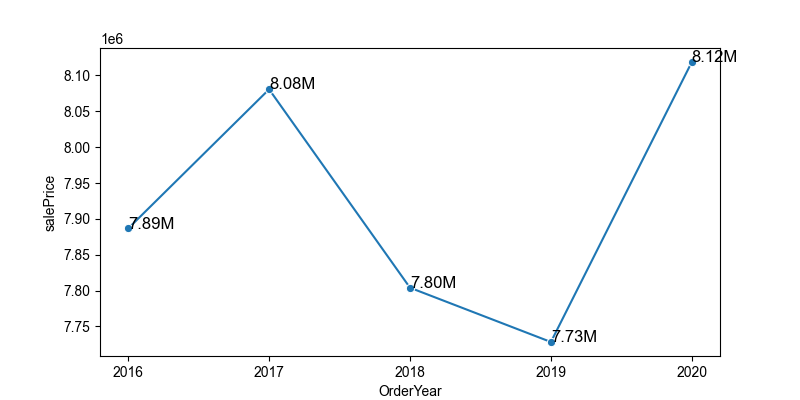

In [13]:
#revenue growth over time - years
rev_by_year = data.groupby('OrderYear')['salePrice'].sum()
rev_by_year = rev_by_year.reset_index(drop= False)
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(rev_by_year, x = "OrderYear", y = "salePrice", estimator = "sum", marker = "o", ax = ax)
for x, y in zip(rev_by_year["OrderYear"], rev_by_year["salePrice"]):
    plt.text(x = x, y= y-150, s = '{:.2f}M'.format((y/1000000)), color = 'black')

plt.plot()
plt.show()

In [14]:
rev_by_year

,OrderYear,salePrice
0,2016,7886604.65
1,2017,8080680.23
2,2018,7804011.96
3,2019,7728319.77
4,2020,8118777.99


Revenue Generated Per Continent 

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\2704383594.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =data, x = "CustomerContinent", y = "salePrice", estimator = "sum", ax = ax, color = "blue", ci = None)


[]

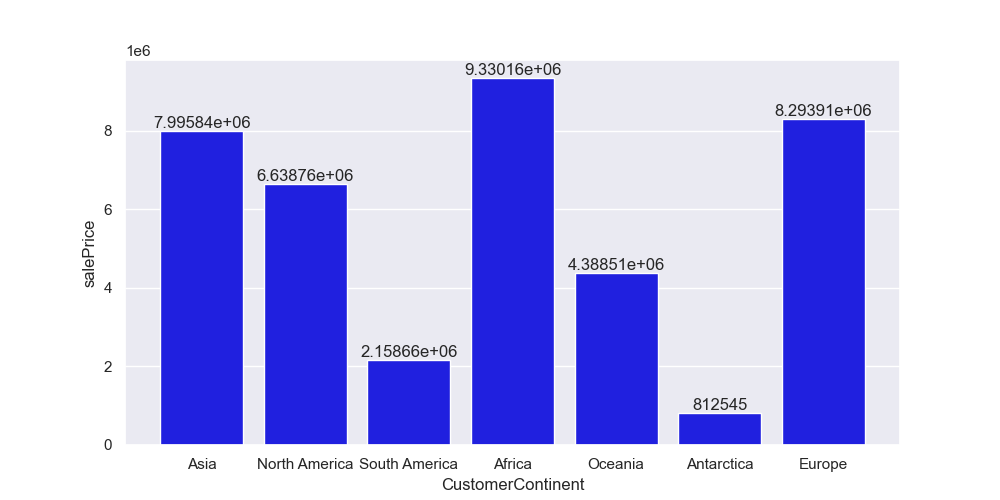

In [15]:
#revenue per continent
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_theme(style="darkgrid")
sns.barplot(data =data, x = "CustomerContinent", y = "salePrice", estimator = "sum", ax = ax, color = "blue", ci = None)
ax.bar_label((ax.containers[0]))

plt.plot()

Year-on-Year Growth Rate by Continent

In [16]:
year_on_year = data.groupby(["OrderMonth", "OrderYear", "CustomerContinent"]).agg(
    totalRevenue=pd.NamedAgg(column='salePrice', aggfunc='sum'),
    totalProfit=pd.NamedAgg(column='ProfitMade', aggfunc='sum'),
    totalQuantityPurchased = pd.NamedAgg(column='QuantitySold', aggfunc='sum'),
    customerCount = pd.NamedAgg(column='CustomerId', aggfunc='nunique')
                            )


In [17]:
year_on_year.head(10)

totalRevenue  totalProfit  \
OrderMonth OrderYear CustomerContinent                              
April      2016      Africa                200321.08     93016.17   
                     Antarctica             24531.99     10073.04   
                     Asia                  143596.21     67247.04   
                     Europe                129990.20     56939.86   
                     North America          71967.15     34002.14   
                     Oceania                56351.67     26576.70   
                     South America          36341.74     13752.77   
           2017      Africa                152666.03     66499.30   
                     Antarctica             34004.55     16065.04   
                     Asia                  133625.23     59191.58   

                                        totalQuantityPurchased  customerCount  
OrderMonth OrderYear CustomerContinent                                         
April      2016      Africa                                420             71  
                     Antarctica                             46              7  
                     Asia                                  313             56  
                     Europe                                257             50  
                     North America                         161             37  
                     Oceania                               126             21  
                     South America                          84             18  
           2017      Africa                                319             64  
                     Antarctica                             49              6  
                     Asia                                  269             58

In [18]:
year_on_year = year_on_year.reset_index(drop = False)

Year on Year Revenue growth per Continent

In [19]:
rev_growth = year_on_year[["OrderYear", "CustomerContinent", "totalRevenue", "totalProfit"]]

In [20]:
rev_growth = rev_growth.groupby(["OrderYear", "CustomerContinent"])["totalRevenue", "totalProfit"].sum()
rev_growth = rev_growth.reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\620348661.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rev_growth = rev_growth.groupby(["OrderYear", "CustomerContinent"])["totalRevenue", "totalProfit"].sum()


In [21]:
rev_growth.head()

,OrderYear,CustomerContinent,totalRevenue,totalProfit
0,2016,Africa,1872551.63,830426.28
1,2016,Antarctica,109845.18,46941.45
2,2016,Asia,1586403.11,713970.19
3,2016,Europe,1575846.97,699572.06
4,2016,North America,1392567.79,627734.79


In [22]:
growth_plot = rev_growth.pivot(index='CustomerContinent', columns='OrderYear', values=["totalRevenue"])

In [23]:
growth_plot

totalRevenue                                                
OrderYear                 2016        2017        2018        2019        2020
CustomerContinent                                                             
Africa              1872551.63  1819218.49  1832091.89  1956612.39  1849682.98
Antarctica           109845.18   204901.24   175020.20   150530.32   172248.07
Asia                1586403.11  1577077.12  1595233.37  1450291.11  1786836.72
Europe              1575846.97  1820112.89  1645218.34  1622627.30  1630109.24
North America       1392567.79  1315053.30  1310702.11  1270591.94  1349847.39
Oceania              934220.59   922186.61   798029.79   849627.13   884448.01
South America        415169.38   422130.58   447716.26   428039.58   445605.58

In [24]:
yoy_rev = growth_plot.pct_change(axis = 'columns')

In [25]:
yoy_rev.head()

totalRevenue                                        
OrderYear                 2016      2017      2018      2019      2020
CustomerContinent                                                     
Africa                     NaN -0.028482  0.007076  0.067966 -0.054650
Antarctica                 NaN  0.865364 -0.145831 -0.139926  0.144275
Asia                       NaN -0.005879  0.011513 -0.090860  0.232054
Europe                     NaN  0.155006 -0.096090 -0.013731  0.004611
North America              NaN -0.055663 -0.003309 -0.030602  0.062377

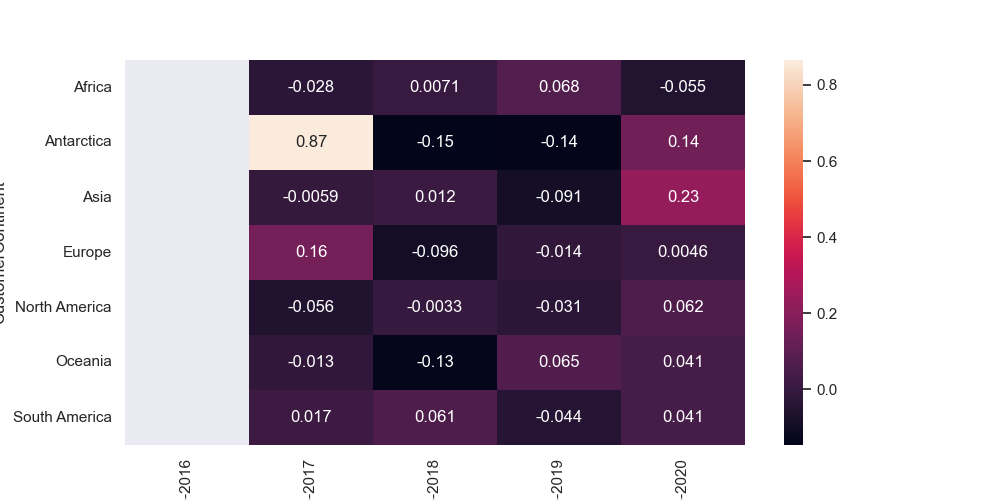

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data =yoy_rev, annot = True, ax = ax)
plt.plot()
plt.show()

<a id= "1b"></a>
## 1b. Product Demand

[]

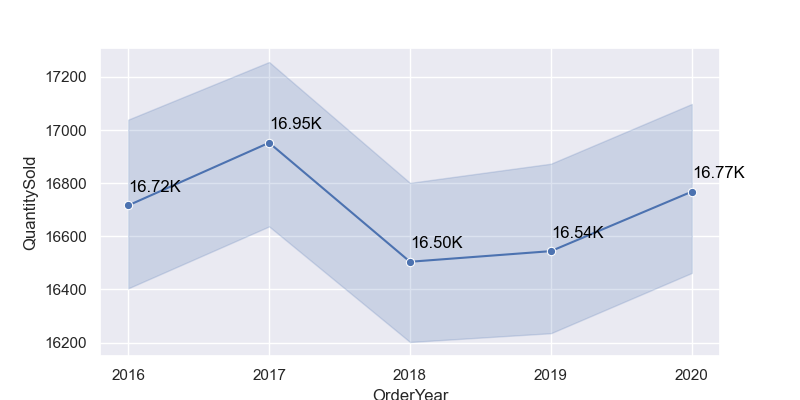

In [27]:
#product quantities sold over time
qty_year = data.groupby("OrderYear")["QuantitySold"].sum()
qty_year = qty_year.reset_index()
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(data, x = "OrderYear", y = "QuantitySold", estimator = "sum", marker = "o", ax = ax)

for x, y in zip(qty_year["OrderYear"], qty_year["QuantitySold"]):
    plt.text(x = x, y = y+50, s = '{:.2f}K'.format(y/1000), color = 'black') 
plt.plot()

<a id = "1c"></a>
## 1c. Product-Market Performance

Top 10 most patronized product categories per year

In [28]:
product_performance = data.groupby([ "OrderYear", "ProductCategory"])["QuantitySold"].sum()

In [29]:
product_performance = product_performance.reset_index(drop = False)
product_performance.head()

,OrderYear,ProductCategory,QuantitySold
0,2016,Automotive,763
1,2016,Baby,669
2,2016,Beauty,682
3,2016,Books,687
4,2016,Clothing,821


In [30]:
top_10 = product_performance.groupby("OrderYear").apply(lambda x: x.sort_values(["QuantitySold"], ascending = False)).reset_index(drop=True)
top_10
# select top N rows within each continent
top_cats = top_10.groupby('OrderYear').head(10)


In [ ]:
top_cats =  top_cats.reset_index(drop=True)
top_cats

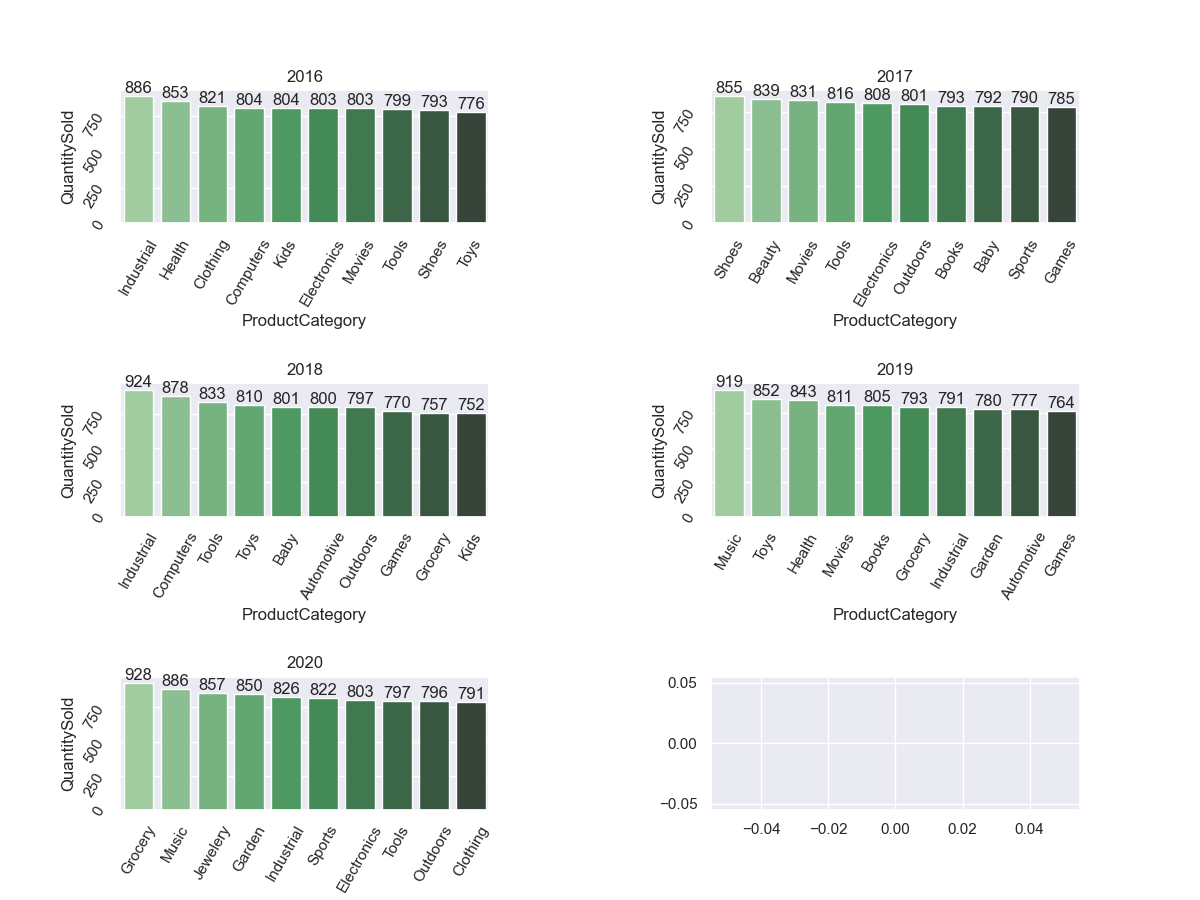

In [118]:


fig, axes = plt.subplots(3,2, sharex = False , figsize = (12, 9))
for i,ax in zip (top_cats["OrderYear"].unique(), axes.flat):
    df = top_cats.where(top_cats["OrderYear"] == i)
    sns.barplot(x = "ProductCategory", y = "QuantitySold", data = df , estimator = sum, ax = ax, palette='Greens_d')
    ax.tick_params(labelrotation=60)
    ax.set_title(i)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=1.2)
    ax.bar_label((ax.containers[0]))
plt.plot()
plt.show()

Least Performing Products

In [124]:
least_5 = product_performance.groupby("OrderYear").apply(lambda x: x.sort_values(["QuantitySold"], ascending = False)).reset_index(drop=True)

# select top N rows within each continent
least_cats = least_5.groupby('OrderYear').tail(5)

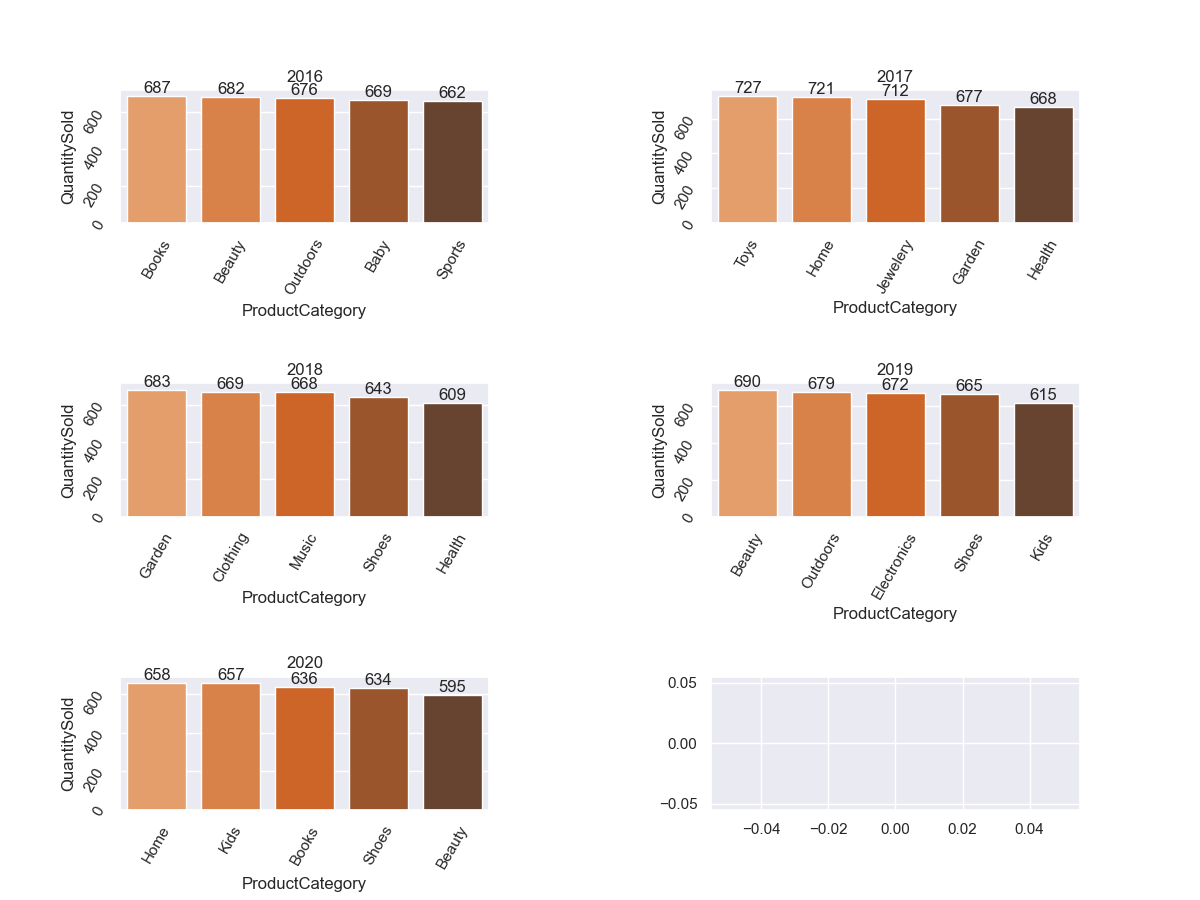

In [125]:
fig, axes = plt.subplots(3,2, sharex = False , figsize = (12, 9))
for i,ax in zip (least_cats["OrderYear"].unique(), axes.flat):
    df = least_cats.where(least_cats["OrderYear"] == i)
    sns.barplot(x = "ProductCategory", y = "QuantitySold", data = df , estimator = sum, ax = ax, palette='Oranges_d')
    ax.tick_params(labelrotation=60)
    ax.set_title(i)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=1.2)
    ax.bar_label((ax.containers[0]))
plt.plot()
plt.show()

# Customer Analysis

[]

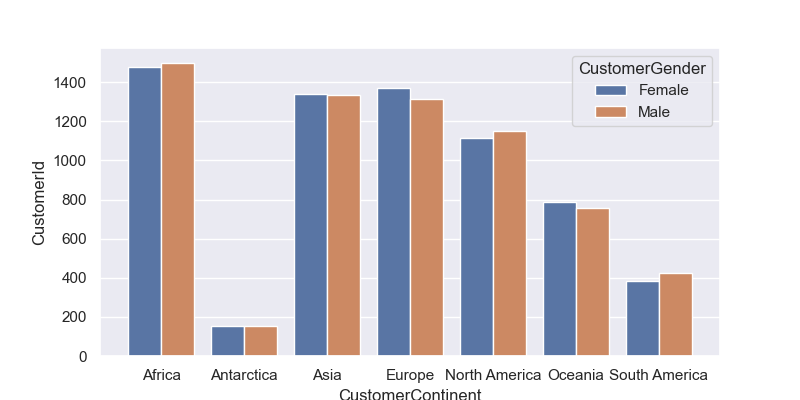

In [33]:
#unique count of customers per continent
customers = data.groupby(["CustomerContinent", "CustomerGender"])["CustomerId"].nunique()
customers = customers.reset_index(drop=False)

fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.barplot(data =customers, x = "CustomerContinent", y = "CustomerId", estimator = "sum", ax = ax, hue = "CustomerGender")
plt.plot()

[]

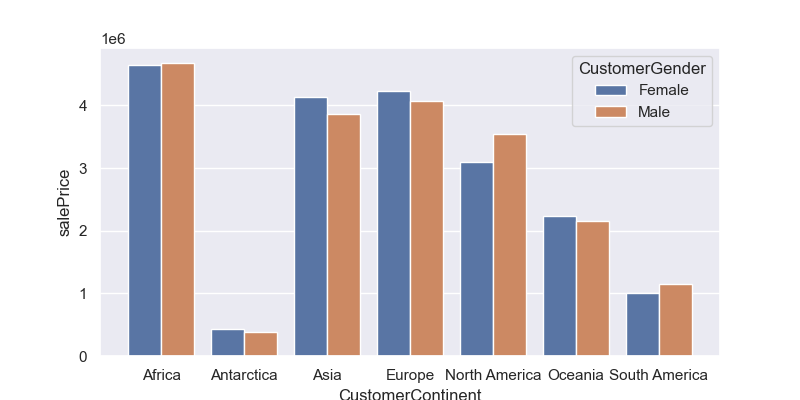

In [34]:
#revenue generated per region by gender
customersRev = data.groupby(["CustomerContinent", "CustomerGender"])["salePrice"].sum()
customersRev = customersRev.reset_index(drop=False)

fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.barplot(data =customersRev, x = "CustomerContinent", y = "salePrice", estimator = "sum", ax = ax, hue = "CustomerGender")
plt.plot()

Continental Customer Growth Analysis

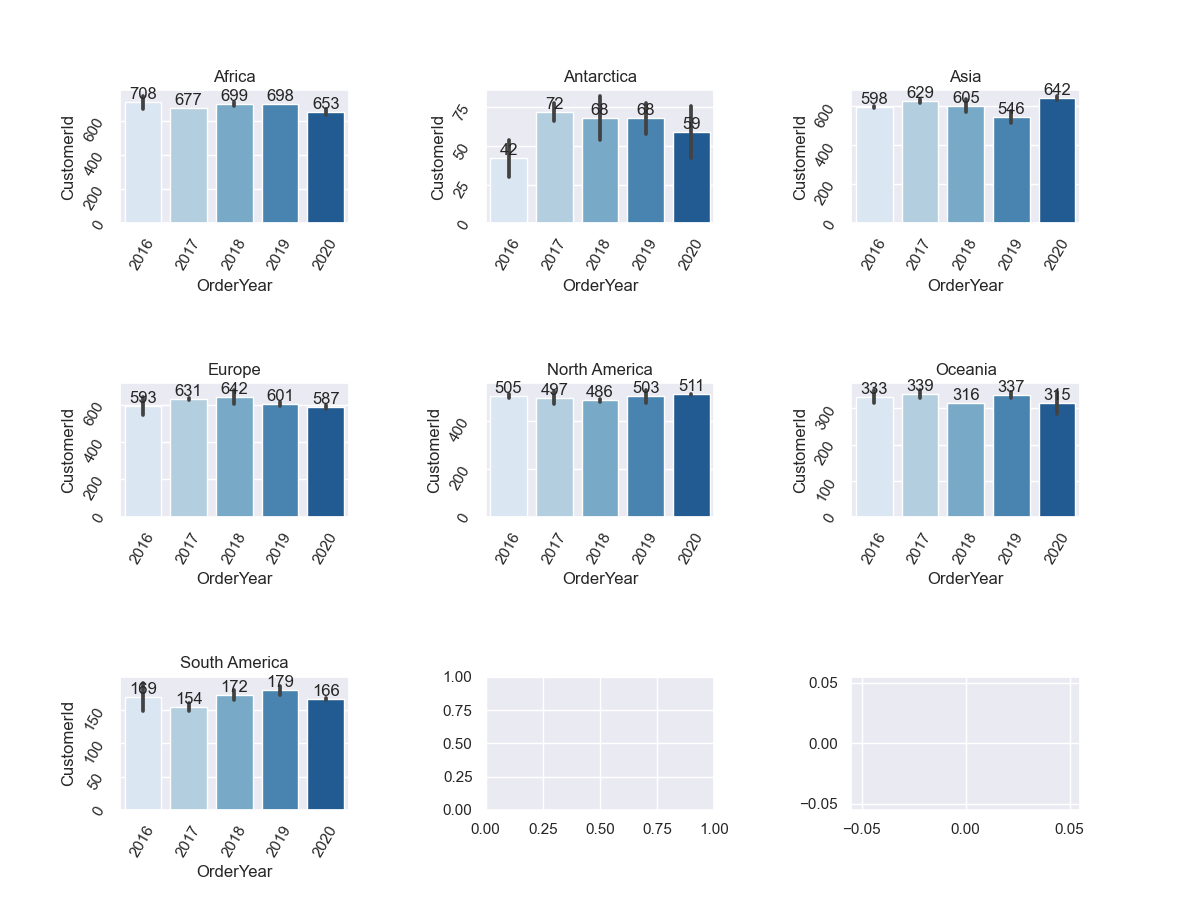

In [128]:
#customer growth over timer per region/continent
customersGrowth = data.groupby(["CustomerContinent", "CustomerGender", "OrderYear"])["CustomerId"].nunique()
customersGrowth = customersGrowth.reset_index(drop=False)

fig, axes = plt.subplots(3,3, sharex = False , figsize = (12, 9))
for i,ax in zip (customersGrowth["CustomerContinent"].unique(), axes.flat):
    df = customersGrowth.where(customersGrowth["CustomerContinent"] == i)
    sns.barplot(x = "OrderYear", y = "CustomerId", data = df , estimator = sum, ax = ax, palette='Blues')
    ax.tick_params(labelrotation=60)
    ax.set_title(i)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=1.2)
    ax.bar_label((ax.containers[0]))
plt.plot()
plt.show()

Feature Engineering - Customer acquisition

In [38]:
data["dateOfPurchase"] = pd.to_datetime(data["dateOfPurchase"])

In [39]:
customerInfo = data.groupby('CustomerId').agg(
    firstPurchaseDate = pd.NamedAgg('dateOfPurchase', aggfunc= 'min'),
    lastPurchaseDate = pd.NamedAgg('dateOfPurchase', aggfunc= 'max'),
    countOfPurchases = pd.NamedAgg('CustomerId', aggfunc= 'count'),
    totalPurchaseValue = pd.NamedAgg('salePrice', aggfunc= 'sum'),
    totalQtyPurchased = pd.NamedAgg('QuantitySold', aggfunc= 'sum'),
    customerProfit = pd.NamedAgg('ProfitMade' , aggfunc= 'sum'),
)

In [40]:
customerInfo = customerInfo.reset_index()

In [41]:
customerInfo = customerInfo.rename(columns={"dateOfPurchase": "firstPurchaseDate"})

In [42]:
customerInfo.head()

,CustomerId,firstPurchaseDate,lastPurchaseDate,countOfPurchases,totalPurchaseValue,totalQtyPurchased,customerProfit
0,1,2020-04-22,2020-04-22,1,864.00,4,360.00
1,2,2017-07-17,2020-04-10,4,15318.08,24,7064.48
2,3,2016-07-21,2020-12-18,5,17036.50,40,8460.95
3,4,2018-04-22,2019-07-15,2,8253.90,11,5745.69
4,5,2016-07-16,2020-12-16,4,3413.18,13,1892.02


In [43]:
customerInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528 entries, 0 to 4527
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerId          4528 non-null   int64         
 1   firstPurchaseDate   4528 non-null   datetime64[ns]
 2   lastPurchaseDate    4528 non-null   datetime64[ns]
 3   countOfPurchases    4528 non-null   int64         
 4   totalPurchaseValue  4528 non-null   float64       
 5   totalQtyPurchased   4528 non-null   int64         
 6   customerProfit      4528 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3)
memory usage: 247.8 KB


In [44]:
customerInfo["daysSinceLastPurchase"] = data['dateOfPurchase'].max() - customerInfo['lastPurchaseDate']
customerInfo["daysSinceLastPurchase"] = customerInfo["daysSinceLastPurchase"].dt.days

In [45]:
# customerInfo["daysSinceLAstPurchase"] = customerInfo["daysSinceLastPurchase"].astype("str")
# customerInfo["daysSinceLAstPurchase"] = customerInfo["daysSinceLastPurchase"].replace(" days", "")
# customerInfo["daysSinceLAstPurchase"] = customerInfo["daysSinceLastPurchase"].astype("int")

In [46]:
customerInfo.head()

,CustomerId,firstPurchaseDate,lastPurchaseDate,countOfPurchases,totalPurchaseValue,totalQtyPurchased,customerProfit,daysSinceLastPurchase
0,1,2020-04-22,2020-04-22,1,864.00,4,360.00,252
1,2,2017-07-17,2020-04-10,4,15318.08,24,7064.48,264
2,3,2016-07-21,2020-12-18,5,17036.50,40,8460.95,12
3,4,2018-04-22,2019-07-15,2,8253.90,11,5745.69,534
4,5,2016-07-16,2020-12-16,4,3413.18,13,1892.02,14


In [47]:
customerInfo["periodOfExistence"] = customerInfo["lastPurchaseDate"] - customerInfo["firstPurchaseDate"]
customerInfo["periodOfExistence"] = customerInfo["periodOfExistence"].dt.days

In [48]:
customerInfo.head()

,CustomerId,firstPurchaseDate,lastPurchaseDate,countOfPurchases,totalPurchaseValue,totalQtyPurchased,customerProfit,daysSinceLastPurchase,periodOfExistence
0,1,2020-04-22,2020-04-22,1,864.00,4,360.00,252,0
1,2,2017-07-17,2020-04-10,4,15318.08,24,7064.48,264,998
2,3,2016-07-21,2020-12-18,5,17036.50,40,8460.95,12,1611
3,4,2018-04-22,2019-07-15,2,8253.90,11,5745.69,534,449
4,5,2016-07-16,2020-12-16,4,3413.18,13,1892.02,14,1614


In [49]:
# customerInfo["purchaseFrequency"] = customerInfo["countOfPurchases"] / customerInfo["periodOfExistence"]

In [50]:
# customerInfo.head()

In [51]:
customerInfo["firstPurchaseYear"] = customerInfo["firstPurchaseDate"].dt.to_period("Y")
customerInfo.head()

,CustomerId,firstPurchaseDate,lastPurchaseDate,countOfPurchases,totalPurchaseValue,totalQtyPurchased,customerProfit,daysSinceLastPurchase,periodOfExistence,firstPurchaseYear
0,1,2020-04-22,2020-04-22,1,864.00,4,360.00,252,0,2020
1,2,2017-07-17,2020-04-10,4,15318.08,24,7064.48,264,998,2017
2,3,2016-07-21,2020-12-18,5,17036.50,40,8460.95,12,1611,2016
3,4,2018-04-22,2019-07-15,2,8253.90,11,5745.69,534,449,2018
4,5,2016-07-16,2020-12-16,4,3413.18,13,1892.02,14,1614,2016


<a id = "2a"></a>
## 2a. Customer Acquisition

[]

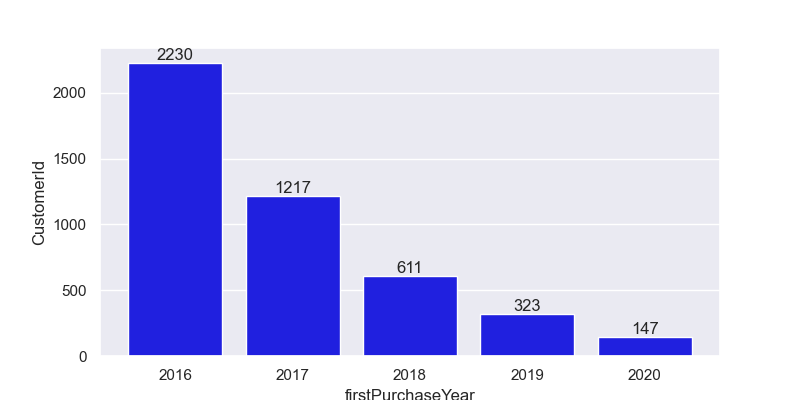

In [126]:
#customer acquisition
acquiredUsers = customerInfo.groupby("firstPurchaseYear")["CustomerId"].nunique()
acquiredUsers = acquiredUsers.reset_index(drop=False)
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.barplot(data =acquiredUsers, x = "firstPurchaseYear", y = "CustomerId", ax = ax, color= "blue")
ax.bar_label((ax.containers[0]))
plt.plot()

<a id ="2c"></a>
## 2c. Customer Lifetime Value

In [53]:
customerInfo["avgorderValue"] = customerInfo["totalPurchaseValue"]/customerInfo["countOfPurchases"]

In [54]:
purchase_freq = sum(customerInfo["totalQtyPurchased"])/customerInfo["CustomerId"].count()

In [55]:
purchase_freq

18.437279151943464

In [56]:

repeat_rate =customerInfo[customerInfo.countOfPurchases > 1].shape[0] / customerInfo["CustomerId"].shape[0]

In [57]:
churn_rate = 1-repeat_rate

In [58]:
repeat_rate, churn_rate

(0.8703621908127208, 0.12963780918727918)

In [59]:
customerInfo["customerValue"] = (customerInfo["avgorderValue"]*purchase_freq)/churn_rate

In [60]:
customerInfo["customerLifetimeValue"] = customerInfo["customerValue"]*customerInfo["customerProfit"]

In [61]:
customerInfo.head()

,CustomerId,firstPurchaseDate,lastPurchaseDate,countOfPurchases,totalPurchaseValue,totalQtyPurchased,customerProfit,daysSinceLastPurchase,periodOfExistence,firstPurchaseYear,avgorderValue,customerValue,customerLifetimeValue
0,1,2020-04-22,2020-04-22,1,864.00,4,360.00,252,0,2020,864.000,122879.345826,4.423656e+07
1,2,2017-07-17,2020-04-10,4,15318.08,24,7064.48,264,998,2017,3829.520,544639.944940,3.847598e+09
2,3,2016-07-21,2020-12-18,5,17036.50,40,8460.95,12,1611,2016,3407.300,484591.197956,4.100102e+09
3,4,2018-04-22,2019-07-15,2,8253.90,11,5745.69,534,449,2018,4126.950,586940.875298,3.372380e+09
4,5,2016-07-16,2020-12-16,4,3413.18,13,1892.02,14,1614,2016,853.295,121356.865043,2.296096e+08


In [62]:
#customer lifetime data
customerInfo.to_csv('../data/customerLifetime.csv')

In [63]:
customerData = pd.read_csv(r'../data/customer_details.csv', index_col=0)

In [64]:
customerData.head()

,CustomerId,CustomerName,CustomerEmail,CustomerGender,CustomerContinent,CustomerCountry
0,4070,Roberta Lesch,Rodrick_Kassulke88@gmail.com,Female,Africa,Seychelles
1,2530,Adaline Hoeger,Vicky93@yahoo.com,Female,Asia,Qatar
2,2697,Yesenia Hahn,Linda48@gmail.com,Male,Africa,Cameroon
3,2405,Fern Stark,Eriberto5@yahoo.com,Female,North America,Guadeloupe
4,4394,Ronaldo Bashirian,Nicole56@hotmail.com,Male,Africa,Swaziland


In [65]:
customerData["CustomerId"].nunique()

4529

In [66]:
customerData.groupby(["CustomerId", "CustomerContinent"])["CustomerId"].nunique()

CustomerId  CustomerContinent
1           Oceania              1
2           Asia                 1
            Europe               1
            North America        1
            Oceania              1
                                ..
4698        Oceania              1
4699        Africa               1
            Asia                 1
            North America        1
            South America        1
Name: CustomerId, Length: 11690, dtype: int64

from the grouped data, it can be inferred that customers make purchases from different continents. Therefore, customers cannot be tied to a continent based on the data available. It will therefore be improper to assess customer lifetime value distribution per continent.

# Time Series Analysis

In [73]:
# date range and frequency of data
data["dateOfPurchase"].min()

Timestamp('2016-01-01 00:00:00')

In [74]:
data["dateOfPurchase"].max()

Timestamp('2020-12-30 00:00:00')

In [75]:
data["dateOfPurchase"].nunique()

1791

<a id = "3a"></a>
## 3a. Time Series Data Transformation

In [76]:
data["dateOfPurchase"] = pd.to_datetime(data["dateOfPurchase"])

In [77]:
# data["monthYear"] = data["dateOfPurchase"].dt.to_period('M')
data['monthYear']=[d.strftime('%Y-%m') for d in data['dateOfPurchase']]

In [135]:
time_series = data[['monthYear', 'OrderYear', 'dateOfPurchase', 'ProductCategory', 'QuantitySold', 'salePrice', 'ProfitMade']]

In [144]:
def season_of_date(date):  
    year = str(date.year)
    seasons = {
        'spring': pd.date_range(start=f'21/03/{year}', end=f'20/06/{year}'),
        'summer': pd.date_range(start=f'21/06/{year}', end=f'22/09/{year}'),
        'autumn': pd.date_range(start=f'23/09/{year}', end=f'20/12/{year}'),
    }
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'



In [145]:
season_of_date(pd.to_datetime(2020-9-15))

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\491397465.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'spring': pd.date_range(start=f'21/03/{year}', end=f'20/06/{year}'),
C:\Users\HP\AppData\Local\Temp\ipykernel_14076\491397465.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'summer': pd.date_range(start=f'21/06/{year}', end=f'22/09/{year}'),
C:\Users\HP\AppData\Local\Temp\ipykernel_14076\491397465.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'autumn': pd.date_range(start=f'23/09/{year}', end=f'20/12/{year}'),


'winter'

In [146]:
time_series["seasons"] =  time_series.dateOfPurchase.map(season_of_date)

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\491397465.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'spring': pd.date_range(start=f'21/03/{year}', end=f'20/06/{year}'),
C:\Users\HP\AppData\Local\Temp\ipykernel_14076\491397465.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'summer': pd.date_range(start=f'21/06/{year}', end=f'22/09/{year}'),
C:\Users\HP\AppData\Local\Temp\ipykernel_14076\491397465.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'autumn': pd.date_range(start=f'23/09/{year}', end=f'20/12/{year}'),
C:\Users\HP\AppData\Local\Te

In [147]:
time_series.head()

,monthYear,OrderYear,dateOfPurchase,ProductCategory,QuantitySold,salePrice,ProfitMade,seasons
2172,2016-01,2016,2016-01-01,Baby,1,380.70,97.29,winter
5229,2016-01,2016,2016-01-01,Grocery,6,4646.46,2297.70,winter
14782,2016-01,2016,2016-01-01,Sports,5,764.75,531.30,winter
12530,2016-01,2016,2016-01-01,Outdoors,6,1514.88,757.44,winter
12250,2016-01,2016,2016-01-01,Industrial,5,660.30,454.40,winter


<a id = "3b"></a>
## 3b. Sales Trends

[]

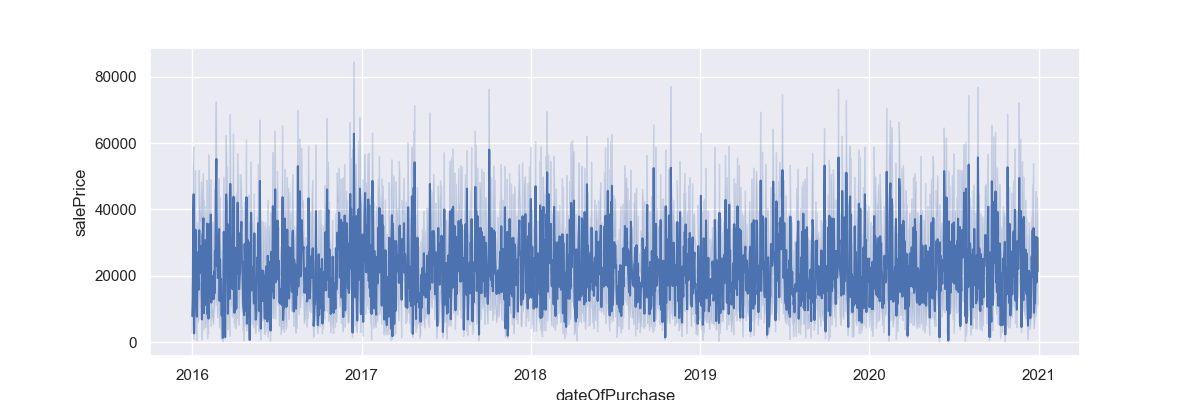

In [78]:
# time series plot with daily data
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(data =data, x = "dateOfPurchase", y = "salePrice", estimator = "sum", ax = ax)
plt.plot()

In [79]:
data = data.sort_values("dateOfPurchase")

[]

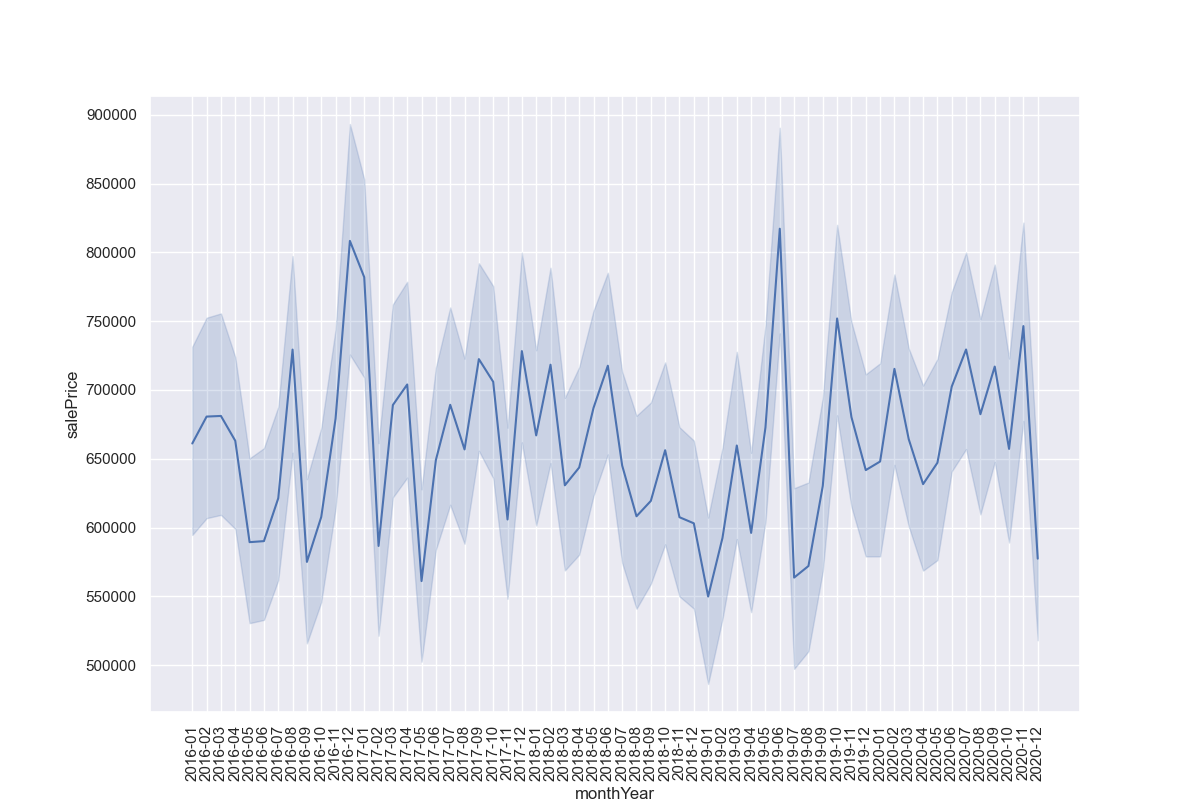

In [133]:
#time series over month-year by revenue
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.lineplot(data =data, x = "monthYear", y = "salePrice", estimator = "sum", ax = ax)
plt.xticks(rotation=90)
plt.plot()

[]

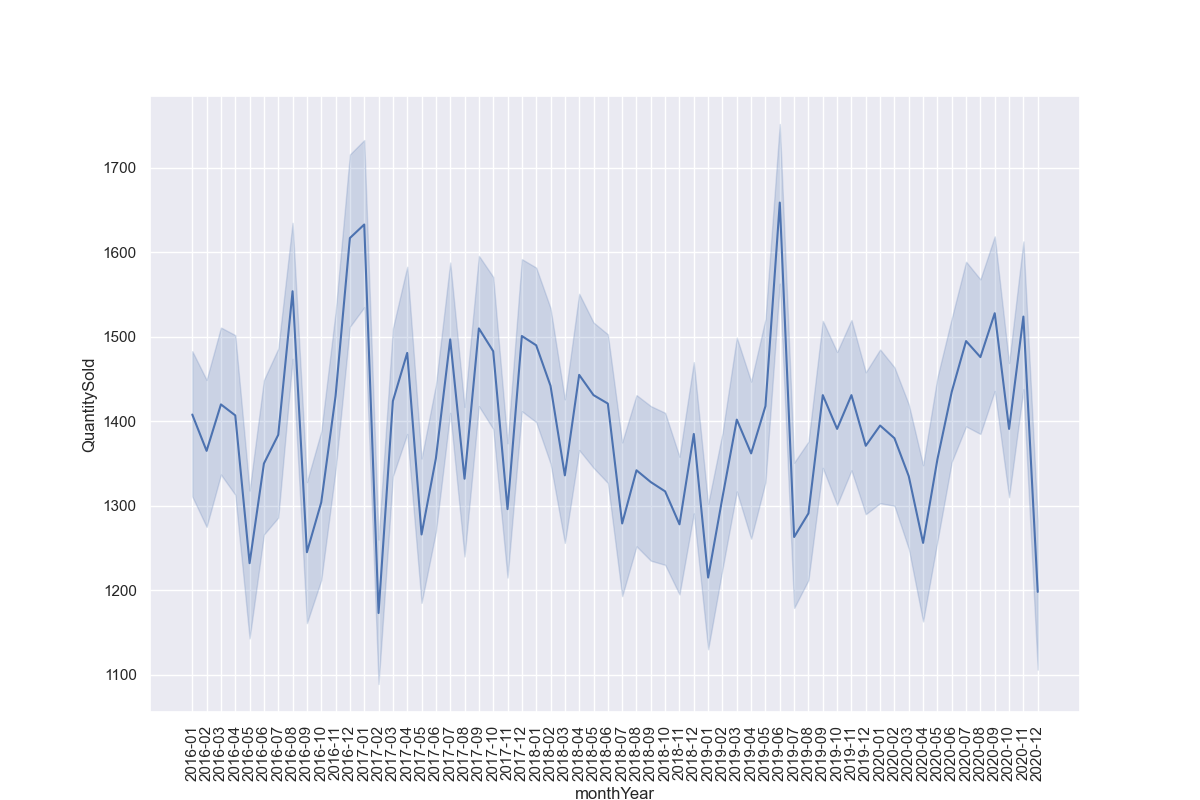

In [134]:
#time series over month-year by quantity sold
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.lineplot(data =data, x = "monthYear", y = "QuantitySold", estimator = "sum", ax = ax)
plt.xticks(rotation=90)
plt.plot()

<a id = "3c"></a>
## 3c. Seasonal Product Performance

Top 5 selling categories per season

In [152]:
time_2020 = time_series[time_series["OrderYear"] == "2020"]

In [154]:
time_2020 = time_2020.groupby(["seasons", "ProductCategory"])["QuantitySold"].sum()
time_2020 = time_2020.reset_index(drop=False)

In [156]:
top_five = time_2020.groupby("seasons").apply(lambda x: x.sort_values(["QuantitySold"], ascending = False)).reset_index(drop=True)

# select top N rows within each continent
top5 = top_five.groupby('seasons').head(5)

In [157]:
top5.head()

,seasons,ProductCategory,QuantitySold
0,autumn,Jewelery,262
1,autumn,Outdoors,239
2,autumn,Grocery,235
3,autumn,Kids,226
4,autumn,Computers,218


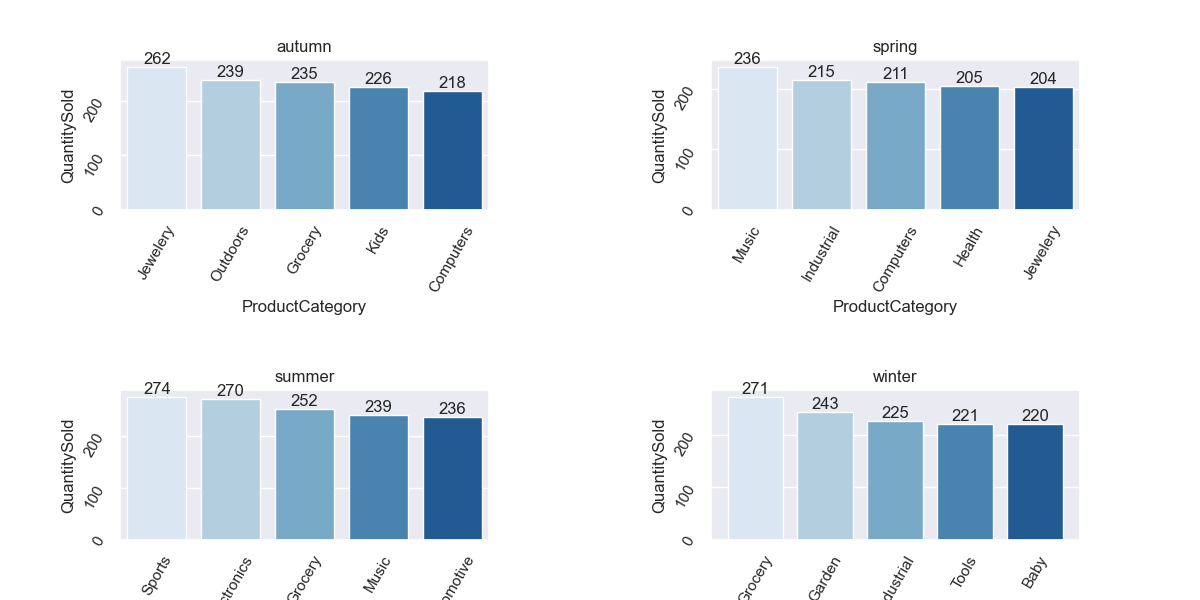

In [158]:
fig, axes = plt.subplots(2,2, sharex = False , figsize = (12, 6))
for i,ax in zip (top5["seasons"].unique(), axes.flat):
    df = top5.where(top5["seasons"] == i)
    sns.barplot(x = "ProductCategory", y = "QuantitySold", data = df , estimator = sum, ax = ax, palette='Blues')
    ax.tick_params(labelrotation=60)
    ax.set_title(i)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=1.2)
    ax.bar_label((ax.containers[0]))
plt.plot()
plt.show()

# Financial Analysis

In [81]:
financial_data = data[["dateOfPurchase", "OrderYear","ProductName", "ProductCategory", "CostOfGood","ProductPrice", "discountPercentage", "ExpectedProfit", "ProfitMade", "QuantitySold" ]]

In [82]:
financial_data.head()

,dateOfPurchase,OrderYear,ProductName,ProductCategory,CostOfGood,ProductPrice,discountPercentage,ExpectedProfit,ProfitMade,QuantitySold
2172,2016-01-01,2016,Soap,Baby,283.41,423.0,10.0,139.59,97.29,1
5229,2016-01-01,2016,Cheese,Grocery,391.46,851.0,9.0,2757.24,2297.70,6
14782,2016-01-01,2016,Keyboard,Sports,46.69,161.0,5.0,571.55,531.30,5
12530,2016-01-01,2016,Bacon,Outdoors,126.24,263.0,4.0,820.56,757.44,6
12250,2016-01-01,2016,Cheese,Industrial,41.18,142.0,7.0,504.10,454.40,5


In [83]:
financial_data["discountInvestment"] = financial_data["ExpectedProfit"] - financial_data["ProfitMade"]

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\2992077977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_data["discountInvestment"] = financial_data["ExpectedProfit"] - financial_data["ProfitMade"]


In [84]:
financial_data.head()

,dateOfPurchase,OrderYear,ProductName,ProductCategory,CostOfGood,ProductPrice,discountPercentage,ExpectedProfit,ProfitMade,QuantitySold,discountInvestment
2172,2016-01-01,2016,Soap,Baby,283.41,423.0,10.0,139.59,97.29,1,42.30
5229,2016-01-01,2016,Cheese,Grocery,391.46,851.0,9.0,2757.24,2297.70,6,459.54
14782,2016-01-01,2016,Keyboard,Sports,46.69,161.0,5.0,571.55,531.30,5,40.25
12530,2016-01-01,2016,Bacon,Outdoors,126.24,263.0,4.0,820.56,757.44,6,63.12
12250,2016-01-01,2016,Cheese,Industrial,41.18,142.0,7.0,504.10,454.40,5,49.70


Impact of Discount on Sales

In [85]:
financial_data["monthYear"] = financial_data["dateOfPurchase"].dt.to_period('M')

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\2367157464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_data["monthYear"] = financial_data["dateOfPurchase"].dt.to_period('M')


In [86]:
discount_summary = financial_data.groupby(["monthYear","OrderYear", "ProductCategory"]).agg(
    productCount = pd.NamedAgg('ProductName', aggfunc = 'nunique'),
    maxDiscount = pd.NamedAgg('discountPercentage', aggfunc= 'max'),
    minDiscount = pd.NamedAgg('discountPercentage', aggfunc= 'min'),
    avgDiscount = pd.NamedAgg('discountPercentage', aggfunc= 'mean'),
    unitsSold = pd.NamedAgg('QuantitySold', aggfunc = 'sum'),
    profits = pd.NamedAgg('ProfitMade', aggfunc= 'sum')
)

In [87]:
discount_summary.head()

productCount  maxDiscount  minDiscount  \
monthYear OrderYear ProductCategory                                           
2016-01   2016      Automotive                 10         10.0          1.0   
                    Baby                       13         10.0          1.0   
                    Beauty                      9          6.0          1.0   
                    Books                       9         10.0          1.0   
                    Clothing                    9         10.0          1.0   

                                     avgDiscount  unitsSold   profits  
monthYear OrderYear ProductCategory                                    
2016-01   2016      Automotive          5.600000         87  18354.87  
                    Baby                6.125000         70  12510.26  
                    Beauty              3.555556         43  11262.98  
                    Books               5.666667         45   7752.74  
                    Clothing            3.090909         66  21330.42

In [88]:
automotive_data = discount_summary.loc[(slice(None), slice(None),"Beauty"), :]

In [89]:
automotive_data

,,,productCount,maxDiscount,minDiscount,avgDiscount,unitsSold,profits
monthYear,OrderYear,ProductCategory,,,,,,
2016-01,2016,Beauty,9,6.0,1.0,3.555556,43,11262.98
2016-02,2016,Beauty,3,10.0,2.0,7.400000,21,3746.92
2016-03,2016,Beauty,9,10.0,1.0,4.333333,60,17371.88
2016-04,2016,Beauty,9,10.0,2.0,5.666667,85,20934.28
2016-05,2016,Beauty,5,8.0,2.0,4.571429,32,3097.84
2016-06,2016,Beauty,9,9.0,1.0,5.500000,46,5927.39
2016-07,2016,Beauty,8,10.0,2.0,6.363636,58,11268.66
2016-08,2016,Beauty,11,10.0,1.0,5.466667,86,20137.90
2016-09,2016,Beauty,10,10.0,3.0,6.250000,41,8504.10


In [90]:
#correlation between avg discount and units sold for automotive
automotive_data["avgDiscount"].corr(automotive_data["unitsSold"])

-0.11390128738174306

In [91]:
automotive_data["avgDiscount"].corr(automotive_data["profits"])

-0.16900484969589272

In [92]:
discount_summary = discount_summary.reset_index(drop = False)
discount_summary.head()

,monthYear,OrderYear,ProductCategory,productCount,maxDiscount,minDiscount,avgDiscount,unitsSold,profits
0,2016-01,2016,Automotive,10,10.0,1.0,5.600000,87,18354.87
1,2016-01,2016,Baby,13,10.0,1.0,6.125000,70,12510.26
2,2016-01,2016,Beauty,9,6.0,1.0,3.555556,43,11262.98
3,2016-01,2016,Books,9,10.0,1.0,5.666667,45,7752.74
4,2016-01,2016,Clothing,9,10.0,1.0,3.090909,66,21330.42


In [93]:
corr_category = discount_summary.groupby(["OrderYear","ProductCategory"])[["avgDiscount", "profits"]].corr().iloc[0::2,-1]

In [94]:
corr_category = corr_category.reset_index(drop = False)
corr_category

,OrderYear,ProductCategory,level_2,profits
0,2016,Automotive,avgDiscount,-0.305232
1,2016,Baby,avgDiscount,0.277134
2,2016,Beauty,avgDiscount,-0.107086
3,2016,Books,avgDiscount,-0.075554
4,2016,Clothing,avgDiscount,-0.372015
...,...,...,...,...
105,2020,Outdoors,avgDiscount,-0.399866
106,2020,Shoes,avgDiscount,-0.158447
107,2020,Sports,avgDiscount,0.195746
108,2020,Tools,avgDiscount,-0.358694


In [95]:
corr_category["ProductCategory"].nunique()

22

In [96]:
pivot_corr_category = corr_category.pivot(index='ProductCategory', columns='OrderYear', values=["profits"])

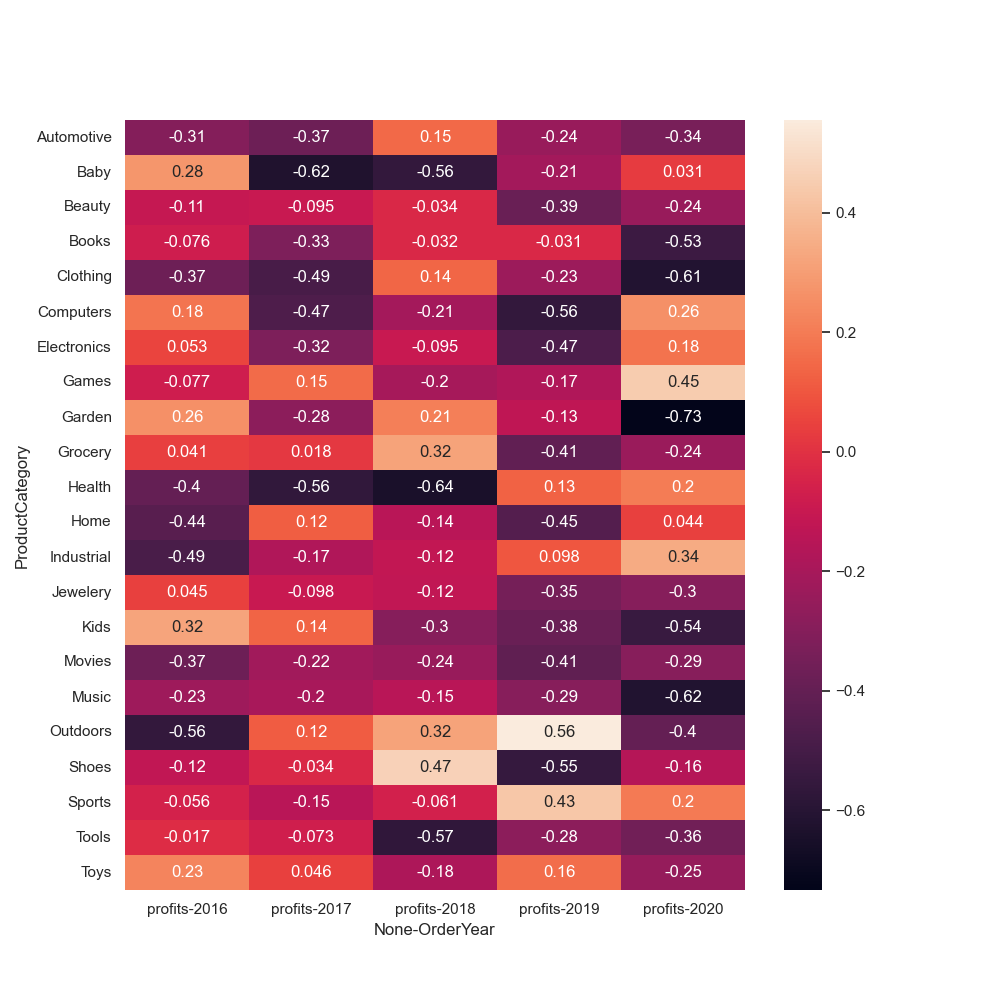

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data= pivot_corr_category, annot = True, ax = ax)
plt.plot()
plt.show()

From the matrix, it can be observed that for most products, there is a negative correlation between discounts and profits. This cannot however be interpreted as discounts causing low profits. There are likely several other factors that impact profits made.

There is a need to therefore exam other factors like product pricing, it's change over time and the probable impact on sales

In [98]:
financial_data.head()

,dateOfPurchase,OrderYear,ProductName,ProductCategory,CostOfGood,ProductPrice,discountPercentage,ExpectedProfit,ProfitMade,QuantitySold,discountInvestment,monthYear
2172,2016-01-01,2016,Soap,Baby,283.41,423.0,10.0,139.59,97.29,1,42.30,2016-01
5229,2016-01-01,2016,Cheese,Grocery,391.46,851.0,9.0,2757.24,2297.70,6,459.54,2016-01
14782,2016-01-01,2016,Keyboard,Sports,46.69,161.0,5.0,571.55,531.30,5,40.25,2016-01
12530,2016-01-01,2016,Bacon,Outdoors,126.24,263.0,4.0,820.56,757.44,6,63.12,2016-01
12250,2016-01-01,2016,Cheese,Industrial,41.18,142.0,7.0,504.10,454.40,5,49.70,2016-01


Probable causes of low returns in 2019

In [99]:
soap_info = financial_data[(financial_data["ProductName"] == "Soap") & (financial_data["OrderYear"] == "2020")]
soap_info

,dateOfPurchase,OrderYear,ProductName,ProductCategory,CostOfGood,ProductPrice,discountPercentage,ExpectedProfit,ProfitMade,QuantitySold,discountInvestment,monthYear
8305,2020-01-01,2020,Soap,Electronics,606.35,905.0,1.0,2687.85,2606.40,9,81.45,2020-01
1135,2020-01-01,2020,Soap,Toys,29.15,55.0,4.0,155.10,141.90,6,13.20,2020-01
1038,2020-01-05,2020,Soap,Sports,1.35,5.0,6.0,36.50,33.50,10,3.00,2020-01
13024,2020-01-10,2020,Soap,Games,48.99,213.0,5.0,1148.07,1073.52,7,74.55,2020-01
9281,2020-01-11,2020,Soap,Computers,672.75,897.0,8.0,224.25,152.49,1,71.76,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3232,2020-12-12,2020,Soap,Baby,189.75,575.0,4.0,385.25,362.25,1,23.00,2020-12
5062,2020-12-17,2020,Soap,Movies,76.38,114.0,2.0,37.62,35.34,1,2.28,2020-12
7391,2020-12-21,2020,Soap,Books,171.12,552.0,9.0,1142.64,993.60,3,149.04,2020-12
12709,2020-12-21,2020,Soap,Games,297.33,583.0,6.0,1999.69,1754.83,7,244.86,2020-12


[]

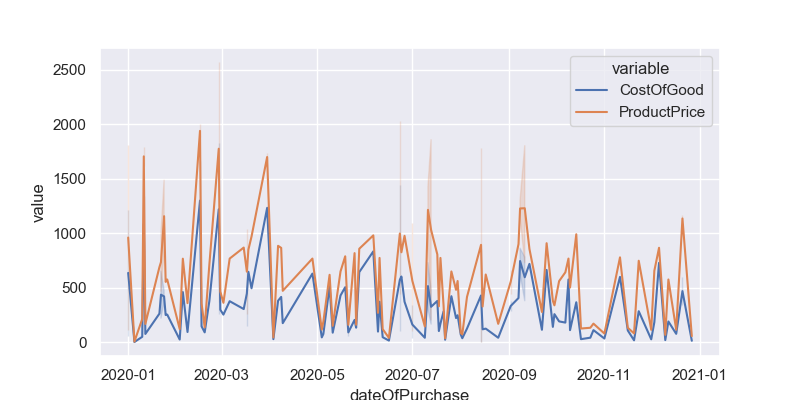

In [100]:
plot_soap = soap_info[["dateOfPurchase", "CostOfGood", "ProductPrice"]]
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(x='dateOfPurchase', y='value', hue='variable', 
             data=pd.melt(plot_soap, ['dateOfPurchase']), estimator = "sum", ax = ax)
plt.plot()

From the above plot, it can be inferred that Product pricing is very sensitive to product cost, for Soap. However, due to the limitations of data, in providing unique id's for product belonging to varying categories, this assessment will be based on categories an cost/price averages.

In [101]:
pricing_summary = financial_data.groupby(["monthYear","OrderYear", "ProductCategory"]).agg(
    avgCost = pd.NamedAgg('CostOfGood', aggfunc = 'mean'),
    avgPrice = pd.NamedAgg('ProductPrice', aggfunc= 'mean'),
    unitsSold = pd.NamedAgg('QuantitySold', aggfunc = 'sum'),
    profits = pd.NamedAgg('ProfitMade', aggfunc= 'sum')
)

In [102]:
pricing_summary = pricing_summary.reset_index(drop = False)

In [103]:
price_2020 = pricing_summary[(pricing_summary["OrderYear"] == "2016") & (pricing_summary["ProductCategory"] == "Beauty")]

In [104]:
price_2020

,monthYear,OrderYear,ProductCategory,avgCost,avgPrice,unitsSold,profits
2,2016-01,2016,Beauty,243.511111,514.888889,43,11262.98
24,2016-02,2016,Beauty,219.484000,500.400000,21,3746.92
46,2016-03,2016,Beauty,242.775000,516.250000,60,17371.88
68,2016-04,2016,Beauty,368.516667,636.000000,85,20934.28
90,2016-05,2016,Beauty,318.155714,442.571429,32,3097.84
112,2016-06,2016,Beauty,200.421000,355.500000,46,5927.39
134,2016-07,2016,Beauty,276.845455,524.636364,58,11268.66
156,2016-08,2016,Beauty,199.121333,412.800000,86,20137.90
178,2016-09,2016,Beauty,242.839167,530.083333,41,8504.10
200,2016-10,2016,Beauty,257.048000,536.500000,62,18213.36


TypeError: Invalid object type at position 0

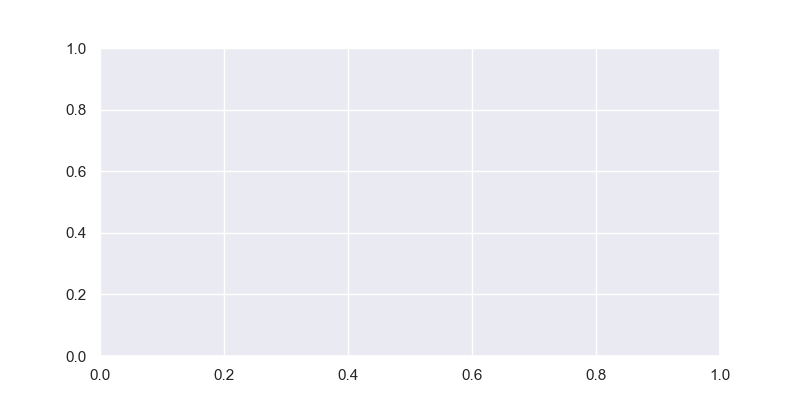

In [105]:
plot_price_2020 = price_2020[["monthYear", "avgCost", "avgPrice"]]
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(x= plot_price_2020['monthYear'], y='value', hue='variable', 
             data=pd.melt(plot_price_2020, ['monthYear']), estimator = "mean", ax = ax)
plt.plot()

In [ ]:
#year-on-year growth rate